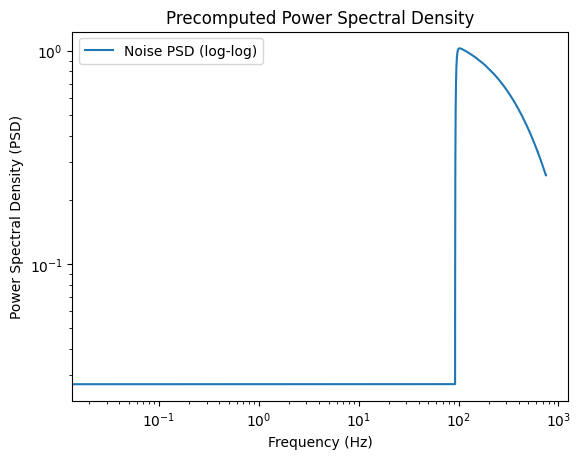

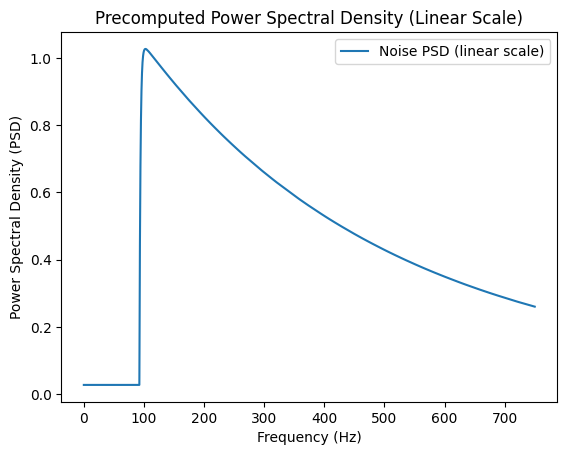

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Ensure current directory is in Python's search path
sys.path.append('.')

# Import custom modules
from OptimumFilter import *
# Load templates, traces, and precomputed PSD
ka_template = np.load('Ka_template.npy')
kb_template = np.load('Kb_template.npy')
ka_data_1 = np.load('Ka_traces_1.npz')
ka_data_2 = np.load('Ka_traces_2.npz')
kb_data = np.load('Kb_traces.npz')

noise_psd = np.load('template_K_alpha_tight.npy')  # Load precomputed PSD

# Extract traces from npz file (assuming it contains an array named 'traces')
traces_a = np.concatenate((ka_data_1['data'], ka_data_1['data']), axis=0)
traces_b = kb_data['data']

sampling_frequency = 1500

# flag, modify
if noise_psd.shape[0] != traces_a.shape[-1]:
    raise ValueError("Noise PSD shape mismatch with trace length")

# Initialize and use OptimumFilter with Ka template
opt_filter_ka = OptimumFilter(template=ka_template, noise_psd=noise_psd, sampling_frequency=sampling_frequency)
amplitude_ka, chi_square_ka = opt_filter_ka.fit(traces_a)


# Initialize and use OptimumFilter with Kb template
opt_filter_kb = OptimumFilter(template=ka_template, noise_psd=noise_psd, sampling_frequency=sampling_frequency)
amplitude_kb, chi_square_kb = opt_filter_kb.fit(traces_b)

# Plot the precomputed PSD
frequencies = np.linspace(0, sampling_frequency / 2, len(noise_psd))  # Generate frequency axis
plt.figure()
plt.loglog(frequencies, noise_psd, label='Noise PSD (log-log)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Precomputed Power Spectral Density')
plt.legend()
plt.show()

plt.figure()
plt.plot(frequencies, noise_psd, label='Noise PSD (linear scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('Precomputed Power Spectral Density (Linear Scale)')
plt.legend()
plt.show()


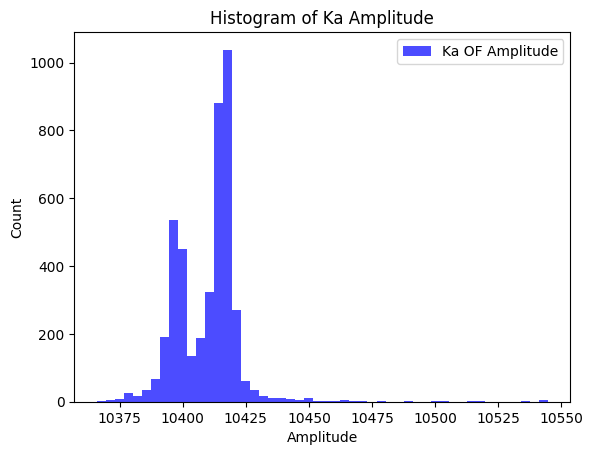

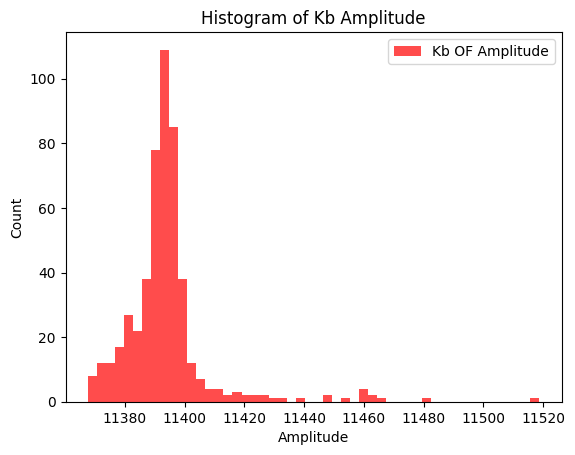

In [3]:
# Plot histograms of Ka and Kb amplitudes
plt.figure()
plt.hist(amplitude_ka, bins=50, alpha=0.7, color='blue', label='Ka OF Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Count')
plt.title('Histogram of Ka Amplitude')
plt.legend()
plt.show()

plt.figure()
plt.hist(amplitude_kb, bins=50, alpha=0.7, color='red', label='Kb OF Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Count')
plt.title('Histogram of Kb Amplitude')
plt.legend()
plt.show()

In [8]:
chi_square_ka

array([1.38111844, 0.90896872, 0.89089126, ..., 1.01516133, 0.89383513,
       1.05494404])

In [15]:
baseline_offset = np.mean(traces_a[:, :2048], axis=1)
print("Average Baseline Offset a:", np.mean(baseline_offset))

Average Baseline Offset a: 130.9970089976226


In [16]:
baseline_offset = np.mean(traces_b[:, :2048], axis=1)
print("Average Baseline Offset b:", np.mean(baseline_offset))

Average Baseline Offset b: 130.97432169025552


In [17]:
type(traces_b)

numpy.ndarray

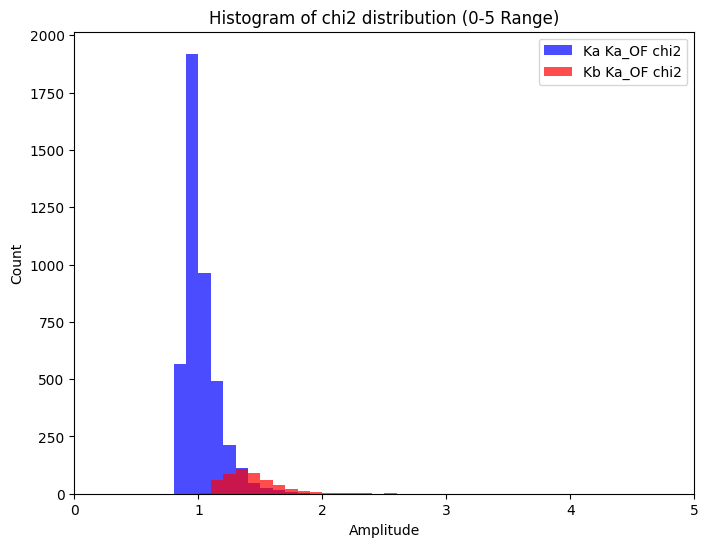

In [14]:
# Plot histograms of Ka and Kb amplitudes with adjusted bins and x-axis range [0, 5]
plt.figure(figsize=(8, 6))
plt.hist(chi_square_ka, bins=np.linspace(0, 5, 51), alpha=0.7, color='blue', label='Ka Ka_OF chi2')
plt.hist(chi_square_kb, bins=np.linspace(0, 5, 51), alpha=0.7, color='red', label='Kb Ka_OF chi2')
plt.xlim(0, 5)  # Limit x-axis
plt.xlabel('Amplitude')
plt.ylabel('Count')
plt.title('Histogram of chi2 distribution (0-5 Range)')
plt.legend()
plt.show()
